In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   race                1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   test_course         1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [3]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
print(df.head())

   gender     race  parental_education         lunch test_course  math_score  \
0  female  group B   bachelor's degree      standard        none          72   
1  female  group C        some college      standard   completed          69   
2  female  group B     master's degree      standard        none          90   
3    male  group A  associate's degree  free/reduced        none          47   
4    male  group C        some college      standard        none          76   

   reading_score  writing_score  total_score  
0             72             74          218  
1             90             88          247  
2             95             93          278  
3             57             44          148  
4             78             75          229  


In [4]:
le_gender=LabelEncoder()
le_race=LabelEncoder()
le_parental_education=LabelEncoder()
le_lunch=LabelEncoder()
le_test_course=LabelEncoder()

df['gender']=le_gender.fit_transform(df['gender'])
df['race']=le_race.fit_transform(df['race'])
df['parental_education']=le_parental_education.fit_transform(df['parental_education'])
df['test_course']=le_test_course.fit_transform(df['test_course'])

print(df.head())



   gender  race  parental_education         lunch  test_course  math_score  \
0       0     1                   1      standard            1          72   
1       0     2                   4      standard            0          69   
2       0     1                   3      standard            1          90   
3       1     0                   0  free/reduced            1          47   
4       1     2                   4      standard            1          76   

   reading_score  writing_score  total_score  
0             72             74          218  
1             90             88          247  
2             95             93          278  
3             57             44          148  
4             78             75          229  


In [5]:
X=df[['gender','race','parental_education','test_course']]
y=df['total_score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

print("Mean square error:",mean_squared_error(y_test,y_pred))
print("R2 score:",r2_score(y_test,y_pred))



Mean square error: 1448.3903143483649
R2 score: 0.16401615273789938


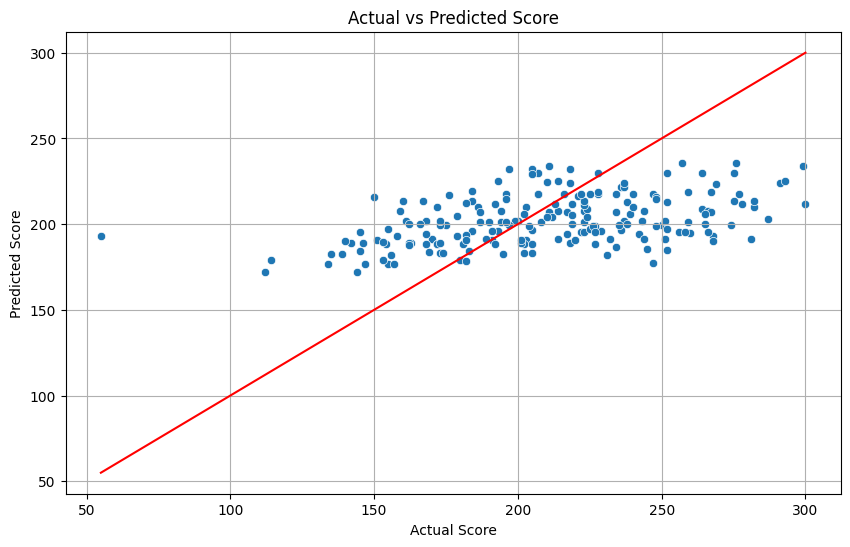

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Score')
plt.grid()
plt.show()